# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/haithemhermessi/usda-national-nutrient-database?resource=download


Import the necessary libraries and create your dataframe(s).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_test = pd.read_csv(r"C:\Users\aigsh\OneDrive\Documents\USDA_national_nutrient_database\test.csv")
print("Test dataset:")
print (df_test.head())
df_train = pd.read_csv(r"C:\Users\aigsh\OneDrive\Documents\USDA_national_nutrient_database\train.csv")
print ("Train dataset:")
print(df_train.head())
# checked if both the datasets are properly loaded above.

Test dataset:
      ID                       FoodGroup  \
0  23116                   Beef Products   
1  10047                   Pork Products   
2  15270  Finfish and Shellfish Products   
3   1259          Dairy and Egg Products   
4  19100                          Sweets   

                                             Descrip  Energy_kcal  Protein_g  \
0  Beef, chuck, under blade steak, boneless, sepa...        275.0      28.23   
1  Pork, fresh, loin, center rib (roasts), bone-i...        248.0      26.99   
2                Crustaceans, shrimp, untreated, raw         85.0      20.10   
3  Cheese spread, American or Cheddar cheese base...        176.0      13.41   
4    Candies, fudge, chocolate, prepared-from-recipe        411.0       2.39   

   Fat_g  Carb_g  Sugar_g  Fiber_g  VitA_mcg  ...  Folate_USRDA  Niacin_USRDA  \
0  18.00    0.00     0.00      0.0       8.0  ...        0.0175      0.235750   
1  14.68    0.00     0.00      0.0       5.0  ...        0.0000      0.593125 

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [6]:
# Combine test and train dataframes
# check for missing values for combined dataframe
df_combined = pd.concat([df_test, df_train], ignore_index = True)
print("missing values in the combined dataframe:")
print(df_combined.isnull().sum())

missing values in the combined dataframe:
ID                  0
FoodGroup           0
Descrip             0
Energy_kcal         0
Protein_g           0
Fat_g               0
Carb_g              0
Sugar_g             0
Fiber_g             0
VitA_mcg            0
VitB6_mg            0
VitB12_mcg          0
VitC_mg             0
VitE_mg             0
Folate_mcg          0
Niacin_mg           0
Riboflavin_mg       0
Thiamin_mg          0
Calcium_mg          0
Copper_mcg          0
Iron_mg             0
Magnesium_mg        0
Manganese_mg        0
Phosphorus_mg       0
Selenium_mcg        0
Zinc_mg             0
VitA_USRDA          0
VitB6_USRDA         0
VitB12_USRDA        0
VitC_USRDA          0
VitE_USRDA          0
Folate_USRDA        0
Niacin_USRDA        0
Riboflavin_USRDA    0
Thiamin_USRDA       0
Calcium_USRDA       0
Copper_USRDA        0
Magnesium_USRDA     0
Phosphorus_USRDA    0
Selenium_USRDA      0
Zinc_USRDA          0
dtype: int64


In [ ]:
# Both the dataframes dont have any missing values.
# I dont have to handle the missing values either by imputing values or by dropping the rows or columns.

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [13]:
# using IQR method to detect potential outliers
# checking for each numerical column individually as different nutrients may have different scales and distribution
df_combined = pd.concat([df_test, df_train], ignore_index = True)
def detect_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
numerical_columns = ['Energy_kcal', 'Protein_g','Fat_g','Carb_g','Sugar_g','Fiber_g',
                     'VitA_mcg','VitB6_mg','VitB12_mcg','VitC_mg','VitE_mg',
                     'Folate_mcg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Calcium_mg','Copper_mcg',
                     'Iron_mg','Magnesium_mg','Manganese_mg','Phosphorus_mg','Selenium_mcg','Zinc_mg']
outlier_summary = {}
for column in numerical_columns:
    outliers = detect_outliers(df_combined, column)
    outlier_summary[column] = {
        'count': len(outliers),
        'percentage' : (len(outliers)/ len(df_combined)) *100,
        'min' : outliers[column].min() if not outliers.empty else None,
        'max' : outliers[column].max() if not outliers.empty else None
    }
                       
# print summary of outliers
for column, summary in outlier_summary.items():
    print(f"outliers in {column}:")
    print(f" Count: {summary['count']}")
    print(f" Percentage: {summary['percentage']:.2f}%")
    print(f" Min value: {summary['min']}")
    print(f" Max value: {summary['max']}")
    print()
    

    

outliers in Energy_kcal:
 Count: 149
 Percentage: 1.73%
 Min value: 703.0
 Max value: 902.0

outliers in Protein_g:
 Count: 52
 Percentage: 0.60%
 Min value: 47.01
 Max value: 88.32

outliers in Fat_g:
 Count: 471
 Percentage: 5.47%
 Min value: 33.3
 Max value: 100.0

outliers in Carb_g:
 Count: 265
 Percentage: 3.07%
 Min value: 82.2
 Max value: 100.0

outliers in Sugar_g:
 Count: 1291
 Percentage: 14.98%
 Min value: 13.27
 Max value: 99.8

outliers in Fiber_g:
 Count: 789
 Percentage: 9.16%
 Min value: 6.1
 Max value: 79.0

outliers in VitA_mcg:
 Count: 1400
 Percentage: 16.25%
 Min value: 53.0
 Max value: 30000.0

outliers in VitB6_mg:
 Count: 412
 Percentage: 4.78%
 Min value: 0.8370000000000001
 Max value: 12.0

outliers in VitB12_mcg:
 Count: 708
 Percentage: 8.22%
 Min value: 3.25
 Max value: 98.89

outliers in VitC_mg:
 Count: 1580
 Percentage: 18.33%
 Min value: 6.3
 Max value: 2400.0

outliers in VitE_mg:
 Count: 1000
 Percentage: 11.60%
 Min value: 1.13
 Max value: 149.4

ou

In [ ]:
The outlier values was spot checked and confirmed that the extreme values are from fortified food products. 
For instance in food group the Lamb, veal, and game prodcuts(veal,variety meats and by-products, liver, cooked, braised) had high vitA_mcg value.
Food group Fats and Oils (fish oil, cod liver) has VitA_mcg of 30000. This was verified by cross refrence in the literature. 
The outliers are not due to errors. It has valid extreme values.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [18]:
#checking for duplicate rows
# checking for high percnetage of missing values
# cheking fo low vairance
df_combined = pd.concat([df_test,df_train],ignore_index = True)
duplicate_rows = df_combined.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
missing_percentages = df_combined.isnull().mean()*100
high_missing = missing_percentages[missing_percentages > 50]
print("\nColumns with more than 50% missing values: ")
print(high_missing)
low_variance_threshold = 0.01
numeric_columns = df_combined.select_dtypes(include = [np.number]).columns
low_variance_cols = df_combined[numeric_columns].var()[df_combined[numeric_columns].var() < low_variance_threshold]
print("\nNumeric Columns with low variance:")
print(low_variance_cols)

Number of duplicate rows: 0

Columns with more than 50% missing values: 
Series([], dtype: float64)

Numeric Columns with low variance:
Copper_USRDA    3.776135e-07
dtype: float64


In [ ]:
I looked for duplicated rows, duplicated columns, columns with data gaps, 
columns with low variance in this data set and did not find any of these anomalies.  I did observe low variance for copper_USRDA however 
its not a limmitations for this analysis.

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [22]:
# check for inconsisitencies in vitamin and mineral count
# some vitamins and minerals should be present in certain food groups
# vitamin C should be presnet in fruits and vegetables
Vit_c_foods = df_combined[(df_combined['FoodGroup'].isin(['Fruits and Fruit juices', 
                                                          'Vegetables and Vegetable Products'])) & (df_combined['VitC_mg'] ==0)]
if len(Vit_c_foods) > 0:
    print("\nFruits/Vegetable with no Vitamin C content:")
    print(Vit_c_foods[['FoodGroup','Descrip','VitC_mg']])
    


Fruits/Vegetable with no Vitamin C content:
                              FoodGroup  \
174   Vegetables and Vegetable Products   
201   Vegetables and Vegetable Products   
237   Vegetables and Vegetable Products   
405   Vegetables and Vegetable Products   
505   Vegetables and Vegetable Products   
509   Vegetables and Vegetable Products   
711   Vegetables and Vegetable Products   
768   Vegetables and Vegetable Products   
808   Vegetables and Vegetable Products   
1167  Vegetables and Vegetable Products   
1734  Vegetables and Vegetable Products   
2043  Vegetables and Vegetable Products   
2658  Vegetables and Vegetable Products   
2935  Vegetables and Vegetable Products   
2954  Vegetables and Vegetable Products   
4106  Vegetables and Vegetable Products   
4370  Vegetables and Vegetable Products   
5252  Vegetables and Vegetable Products   
5263  Vegetables and Vegetable Products   
5695  Vegetables and Vegetable Products   
5801  Vegetables and Vegetable Products   
6530  Veg

In [7]:
#check if total macronurtients exceed total energy
df_combined ['Total_macronutrients'] = (df_combined['Protein_g'] * 4 +
                                        df_combined['Fat_g'] * 9 +
                                        df_combined['Carb_g'] * 4)
inconsistent_energy = df_combined[df_combined['Total_macronutrients'] > df_combined['Energy_kcal']]
print("Items with inconsistent energy values:")
print(inconsistent_energy[['FoodGroup','Descrip','Energy_kcal','Total_macronutrients']])

Items with inconsistent energy values:
                              FoodGroup  \
3                Dairy and Egg Products   
5                         Fats and Oils   
6                     Breakfast Cereals   
7     Vegetables and Vegetable Products   
10                    Breakfast Cereals   
...                                 ...   
8612                         Baby Foods   
8613              Nut and Seed Products   
8614             Dairy and Egg Products   
8615                             Snacks   
8617                      Beef Products   

                                                Descrip  Energy_kcal  \
3     Cheese spread, American or Cheddar cheese base...        176.0   
5     Salad dressing, french dressing, reduced fat, ...        233.0   
6     Cereals, QUAKER, Instant Oatmeal, raisins, dat...        371.0   
7     Radishes, oriental, cooked, boiled, drained, w...         17.0   
10    Cereals ready-to-eat, KELLOGG, KELLOGG'S APPLE...        375.0   
...         

C:\Users\aigsh\AppData\Local\Temp\ipykernel_25792\2662066435.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


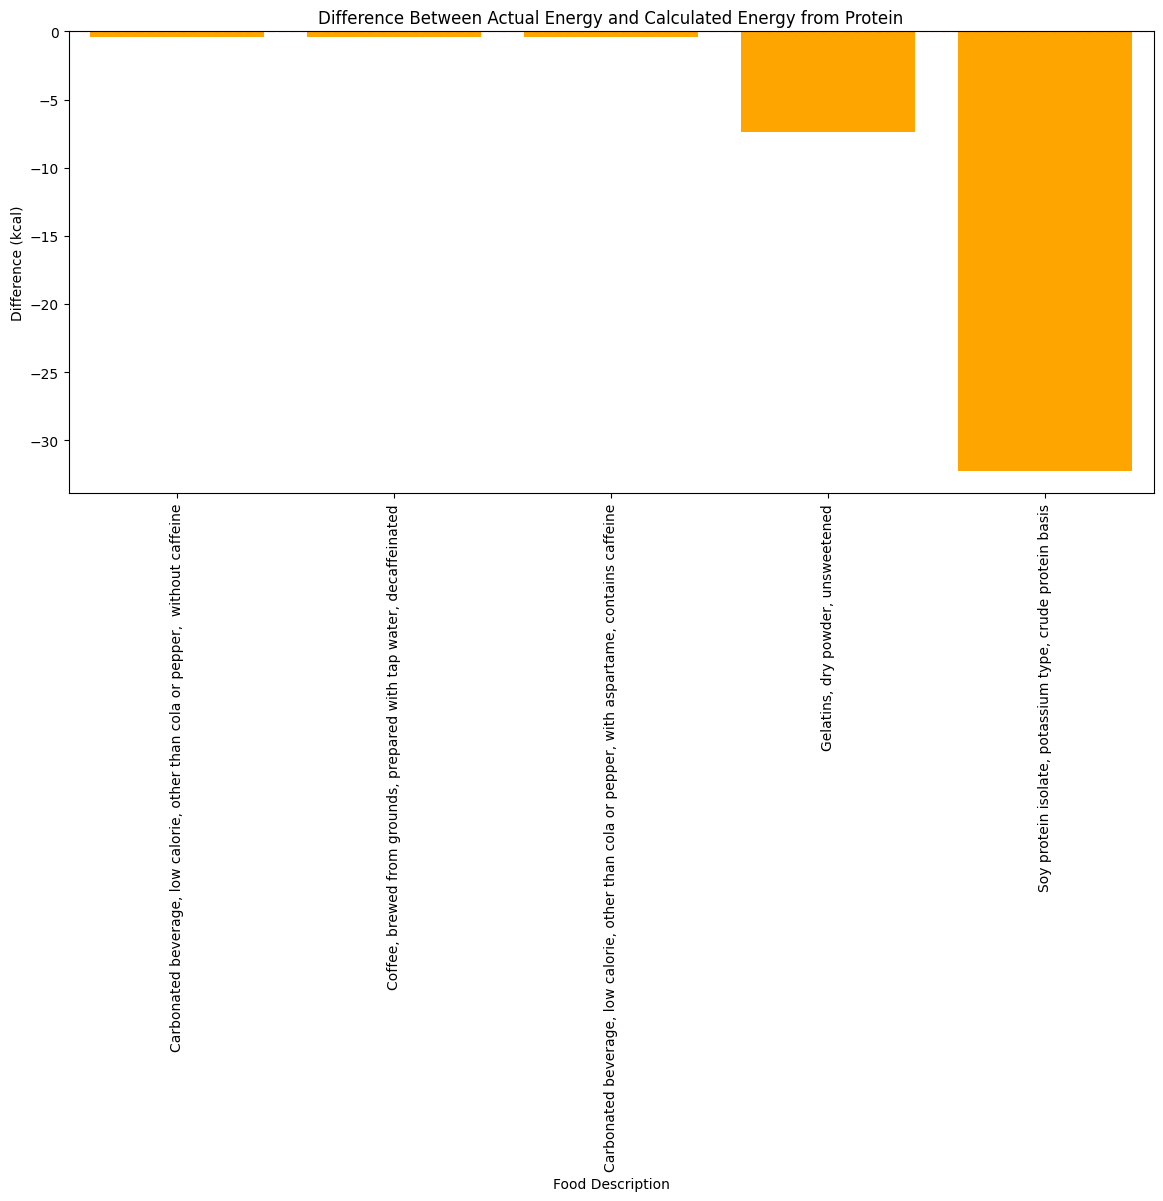

In [14]:

# Step 1: Calculate Total Energy from Protein
# Step 2: Calculate Difference
# Step 3: Identify items with inconsistent energy values
# Step 4: Sort by Difference
# Visualization
# Create a color mapping based on the Difference values
# Create the bar plot using custom colors


df_combined['Total_protein_energy'] = df_combined['Protein_g'] * 4  # 4 kcal per gram of protein
df_combined['Difference'] = df_combined['Energy_kcal'] - df_combined['Total_protein_energy']
inconsistent_protein_energy = df_combined[df_combined['Total_protein_energy'] > df_combined['Energy_kcal']]
sorted_inconsistent_protein_energy = inconsistent_protein_energy.sort_values(by='Difference', ascending=False)
plt.figure(figsize=(14, 6))
colors = ['green' if diff > 0 else 'orange' for diff in sorted_inconsistent_protein_energy['Difference']]
sns.barplot(x='Descrip', y='Difference', data=sorted_inconsistent_protein_energy, color='gray')  # Set a default color

# Manually set colors for each bar after plotting
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i])  # Set color based on the difference

plt.xticks(rotation=90)
plt.title('Difference Between Actual Energy and Calculated Energy from Protein')
plt.xlabel('Food Description')
plt.ylabel('Difference (kcal)')
plt.axhline(0, color='red', linestyle='--')  # Line at zero for reference
plt.tight_layout()
plt.show()

C:\Users\aigsh\AppData\Local\Temp\ipykernel_25792\309032775.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Descrip', y='Difference', data=top_20_inconsistent, palette=colors)


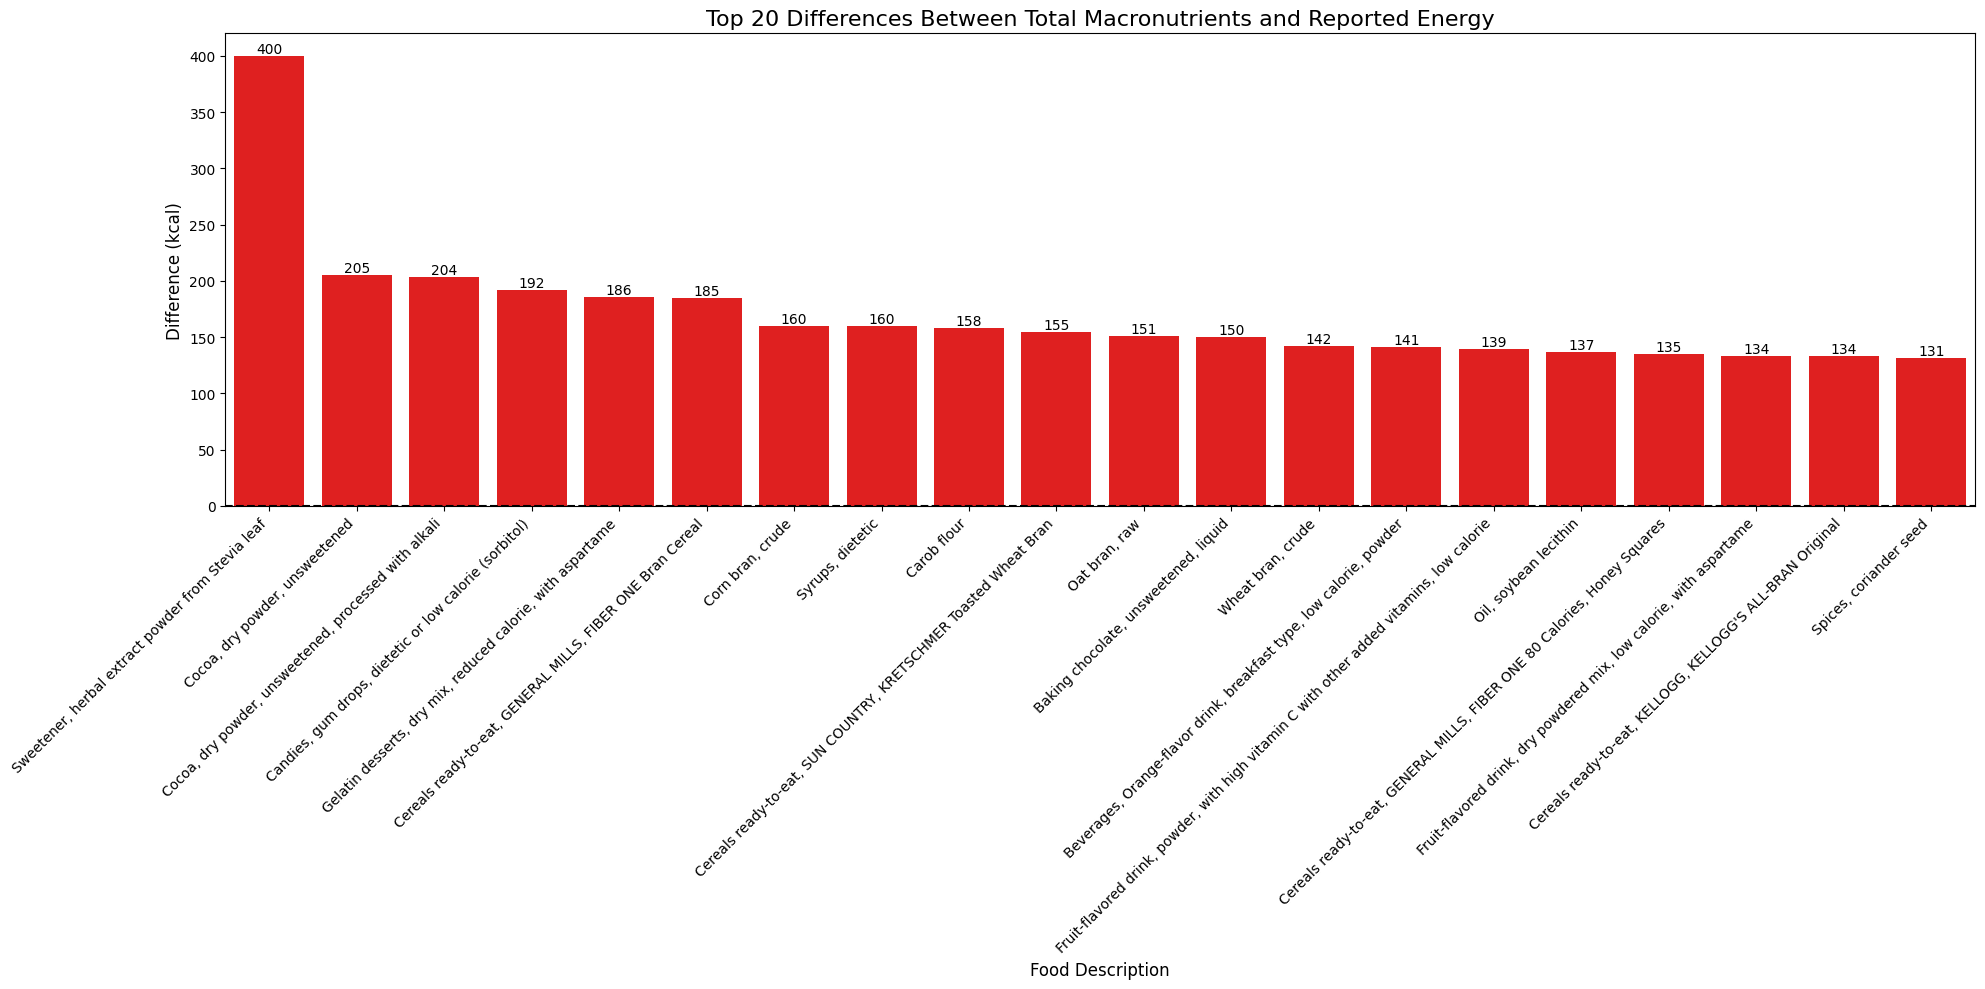

Top 10 items with the largest discrepancies:
                                                         Descrip  Energy_kcal  Total_macronutrients  Difference
               Sweetener, herbal extract powder from Stevia leaf          0.0                400.00      400.00
                                  Cocoa, dry powder, unsweetened        228.0                433.30      205.30
           Cocoa, dry powder, unsweetened, processed with alkali        220.0                423.50      203.50
          Candies, gum drops, dietetic or low calorie (sorbitol)        162.0                353.80      191.80
      Gelatin desserts, dry mix, reduced calorie, with aspartame        198.0                383.52      185.52
      Cereals ready-to-eat, GENERAL MILLS, FIBER ONE Bran Cereal        200.0                384.92      184.92
                                                Corn bran, crude        224.0                384.28      160.28
                                                Syrups, die

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_combined is your DataFrame
# If you don't have df_combined, replace it with your actual DataFrame name

# Calculate Total Macronutrients
df_combined['Total_macronutrients'] = (df_combined['Protein_g'] * 4 +
                                       df_combined['Fat_g'] * 9 +
                                       df_combined['Carb_g'] * 4)

# Calculate the difference
df_combined['Difference'] = df_combined['Total_macronutrients'] - df_combined['Energy_kcal']

# Identify inconsistent items (where Total_macronutrients > Energy_kcal)
inconsistent_energy = df_combined[df_combined['Total_macronutrients'] > df_combined['Energy_kcal']]

# Sort by the absolute difference to show the largest discrepancies first
sorted_inconsistent_energy = inconsistent_energy.sort_values(by='Difference', key=abs, ascending=False)

# Take only the top 20 items for visualization
top_20_inconsistent = sorted_inconsistent_energy.head(20)

# Create color list
colors = ['red' if diff > 0 else 'blue' for diff in top_20_inconsistent['Difference']]

# Create the plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Descrip', y='Difference', data=top_20_inconsistent, palette=colors)

plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Differences Between Total Macronutrients and Reported Energy', fontsize=16)
plt.xlabel('Food Description', fontsize=12)
plt.ylabel('Difference (kcal)', fontsize=12)
plt.axhline(0, color='black', linestyle='--')  # Line at zero for reference

# Add value labels on the bars
for i, v in enumerate(top_20_inconsistent['Difference']):
    ax.text(i, v, f'{v:.0f}', ha='center', va='bottom' if v > 0 else 'top', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print the top 10 most inconsistent items
print("Top 10 items with the largest discrepancies:")
print(sorted_inconsistent_energy[['Descrip', 'Energy_kcal', 'Total_macronutrients', 'Difference']].head(10).to_string(index=False))

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

In [ ]:
1.No i did not find all four types of dirty data in my dataset. Data sets seems to be cleaner.
2.Vit_c column contained large number of 0 values. Upon exploring i learnt that there are numberous products like Mushroom etc contibuted for 0 values.
3.Presence of extreme values(outlier) may have to be handled with different scaling for effective visualiztion.